<a href="https://colab.research.google.com/github/fpinto2021/EGN-Statistics-/blob/main/Pinto_Felipe_Lab_10_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Imports

In [93]:
# Start off by collecting imports from library.

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [95]:
!pip install wandb
import wandb as wb

In [96]:
# Some plotting here.

In [97]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

In [98]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [99]:
# Get batch is like a blackjack dealer, giving us a specific amount of data.

In [100]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y


## MNIST
    

### Load Data

In [101]:
# First start off by getting our MNIST, the test set.

In [102]:
# #MNIST
train_set = MNIST('./data', train=True, download=True)
test_set  = MNIST('./data', train=False, download=True)

#KMNIST
# train_set = KMNIST('./data', train=True, download=True)
# test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = FashionMNIST('./data', train=True, download=True)
# test_set =  FashionMNIST('./data', train=False, download=True)

In [103]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [104]:
# 60000 images, with height and width.

In [105]:
X.shape

(60000, 1, 28, 28)

In [106]:
# The output of the image.

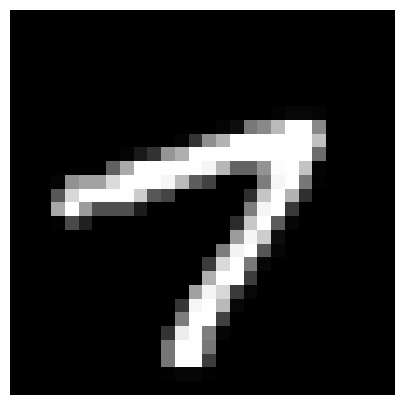

In [107]:
plot(X[101,0,:,:])

In [108]:
# The label of the 100th image

In [109]:
Y[100]

5

In [110]:
# The expression X[0:25, 0, :, :] selects a subset of images from the training set.

In [111]:
X[0:25,0,:,:].shape

(25, 28, 28)

In [112]:
# To create a montage plot of a subset of images from your dataset, we use the montage_plot function from the torchvision.utils module.

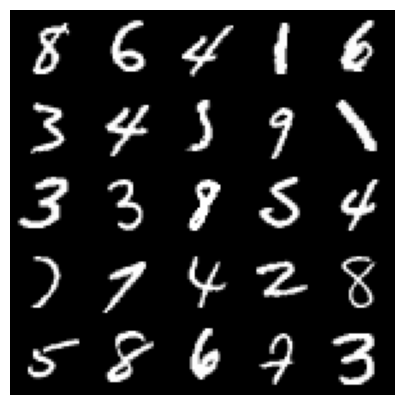

In [113]:
montage_plot(X[125:150,0,:,:])

In [114]:
# Retrieving the size of the first dimension of the array X.

In [115]:
X.shape[0]

60000

In [116]:
# Retrieves the shape of the array X_test, which contains the testing set images.

In [117]:
X_test.shape

(10000, 1, 28, 28)

In [118]:
X.shape[0]

60000

In [119]:
X_test.shape[0]

10000

In [120]:
# Here we are defining two functions, GPU and GPU_data, to move data to the GPU using PyTorch.

In [121]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [122]:
# Here we are using the GPU_data function to move your data tensors (X, Y, X_test, Y_test) to the GPU.

In [123]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [124]:
#  Here we are reshaping our input data tensors X and X_test into a flattened format where each image is represented as a 1D vector of length 784.

In [125]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)


### Classifier


In [126]:
# This function retrieves a batch of data from your training set, returning input data x and corresponding labels y.

In [127]:
x,y = get_batch('train')

In [128]:
#  Retrieves the shape of the array x, which represents the input data for a batch of samples.

In [129]:
x.shape

torch.Size([1000, 784])

In [130]:
# Plotting our result.

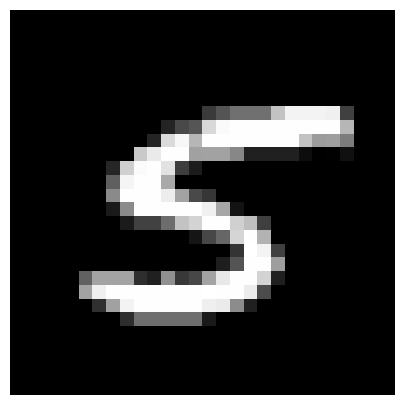

In [131]:
plot(x[0].reshape(28,28))

In [132]:
# Reshaping the image.

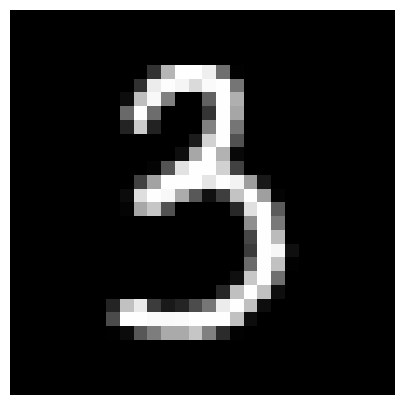

In [133]:
plot(x[1].reshape(28,28))

In [134]:
# Again here.

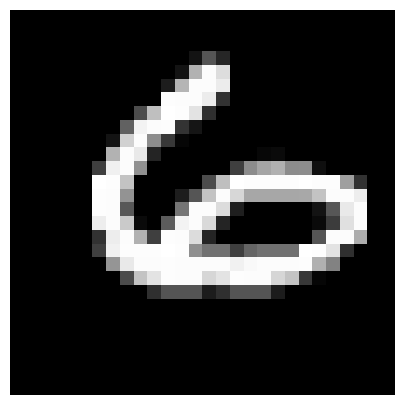

In [135]:
plot(x[2].reshape(28,28))

In [136]:
# Inspecting the labels of the first 10 samples in your batch.

In [137]:
y[:10]

tensor([5., 3., 6., 2., 7., 5., 8., 2., 9., 8.], device='cuda:0')

In [138]:
# Initializing a weight matrix W for a neural network with random values.

In [139]:
W = GPU(np.random.randn(784,10))

In [140]:
# The expressions x.shape and W.shape retrieve the shapes of the arrays x and W, respectively.

In [141]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [142]:
# Performs matrix multiplication between the input data tensor x and the weight matrix W.

In [143]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [144]:
# Also performs matrix multiplication between the input data tensor x and the weight matrix W.

In [145]:
(x@W).shape

torch.Size([1000, 10])

In [146]:
# Command to measure the execution time of the matrix multiplication operation x @ W.

In [147]:
%%timeit
x@W

37.9 µs ± 7.74 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [148]:
x@W

tensor([[  7.6123,  -9.7032,  -4.1643,  ...,   5.3329, -12.9934,  11.3382],
        [-10.4300,  -1.0424,   8.3164,  ...,   6.9253,  -5.4304,   8.4190],
        [ -2.5835,   6.2973, -13.2891,  ...,  10.6322,   5.8803,   7.4805],
        ...,
        [  1.4328, -10.4689,  10.7170,  ...,  10.6655,   8.0074,  -0.4868],
        [ -4.2401,  -0.2195,   5.0895,  ...,   5.6092,  -2.6120,  -9.5443],
        [  6.4283,   0.9563,  -5.2075,  ...,   4.2387,  -4.7101, -14.5375]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [149]:
# Assigning our results to a variable.

In [150]:
y2 = x@W

In [151]:
# Plotting our results.

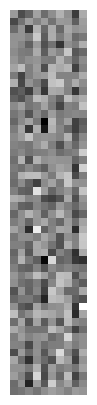

In [152]:
plot(y2[:50])

In [153]:
y.shape

torch.Size([1000])

In [154]:
# We are defining a function that converts categorical labels into one-hot encoded vectors.

In [155]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [156]:
# The results.

In [157]:
one_hot(y)

<ipython-input-121-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]], device='cuda:0')

In [158]:
# Used to find the index of the maximum value along a specified dimension of the tensor y2.

In [159]:
torch.argmax(y2,1)

tensor([6, 9, 3, 3, 9, 7, 6, 1, 5, 6, 5, 7, 9, 5, 5, 5, 2, 4, 9, 1, 9, 7, 7, 3,
        0, 6, 6, 4, 3, 9, 9, 4, 5, 5, 6, 6, 5, 5, 9, 7, 7, 5, 7, 7, 6, 6, 3, 3,
        5, 5, 5, 8, 5, 9, 5, 9, 7, 5, 1, 3, 9, 5, 5, 6, 5, 0, 7, 3, 7, 9, 3, 5,
        5, 7, 3, 7, 3, 3, 5, 7, 3, 5, 5, 9, 5, 6, 5, 3, 9, 0, 7, 7, 7, 5, 7, 0,
        5, 5, 9, 9, 9, 7, 3, 3, 3, 5, 6, 3, 4, 7, 2, 5, 3, 7, 5, 0, 5, 9, 5, 1,
        6, 9, 4, 5, 2, 5, 5, 5, 9, 3, 9, 7, 3, 4, 6, 1, 6, 5, 3, 9, 3, 3, 7, 7,
        3, 0, 1, 3, 9, 5, 3, 7, 5, 9, 3, 3, 0, 5, 3, 6, 3, 7, 5, 5, 5, 7, 5, 5,
        6, 6, 5, 7, 7, 0, 3, 9, 0, 6, 5, 3, 9, 1, 3, 9, 6, 9, 5, 5, 9, 7, 1, 7,
        3, 7, 7, 9, 3, 6, 4, 2, 6, 5, 6, 6, 5, 5, 7, 7, 5, 7, 7, 5, 9, 9, 5, 6,
        3, 7, 3, 7, 9, 5, 3, 3, 1, 9, 9, 9, 9, 7, 9, 5, 2, 8, 5, 9, 3, 3, 3, 5,
        1, 9, 5, 3, 6, 0, 8, 9, 7, 9, 9, 3, 3, 9, 5, 1, 9, 6, 3, 9, 5, 6, 6, 3,
        6, 5, 5, 9, 3, 4, 7, 9, 7, 3, 6, 9, 3, 0, 3, 7, 6, 5, 5, 3, 1, 6, 8, 1,
        3, 9, 7, 3, 5, 7, 2, 5, 3, 5, 2,

In [160]:
# Calculates the accuracy of the predictions made by our neural network.

In [161]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.1360, device='cuda:0')

In [162]:
# Its shape.

In [163]:
X.shape

torch.Size([60000, 784])

In [164]:
# Performing matrix multiplication between the input data tensor X and the weight matrix W.

In [165]:
X@W

tensor([[-10.4477,  -2.0152,   0.1834,  ...,   7.8009,   4.7253,  -6.6183],
        [ -3.7048,   6.0421,  -2.6440,  ...,   4.6411,  -8.9589,   6.3476],
        [ -6.7473,   4.6905,  -6.4413,  ...,  -0.4797,  -1.8480,  -2.3462],
        ...,
        [ -2.0943,   5.9223,  -1.2157,  ...,  -0.2196,  -1.8036,   3.2670],
        [-10.2082,  -4.3224,  -0.0827,  ...,  11.1117,  -8.4952,   3.6114],
        [ -4.2701,   5.2896,  -7.1830,  ...,   4.1113,  -6.5372,   5.3941]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [166]:
# Calculates the index of the maximum value along the second dimension of the tensor resulting from the matrix multiplication X @ W.

In [167]:
torch.argmax(X@W,1)

tensor([3, 6, 1,  ..., 3, 7, 3], device='cuda:0')

In [168]:
# The output.

In [169]:
Y

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [170]:
# Calculates the accuracy of the predictions made by our neural network.

In [171]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.1466, device='cuda:0')

In [172]:
# Performing matrix multiplication between the input data tensor X and the weight matrix W.

In [173]:
X@W

tensor([[-10.4477,  -2.0152,   0.1834,  ...,   7.8009,   4.7253,  -6.6183],
        [ -3.7048,   6.0421,  -2.6440,  ...,   4.6411,  -8.9589,   6.3476],
        [ -6.7473,   4.6905,  -6.4413,  ...,  -0.4797,  -1.8480,  -2.3462],
        ...,
        [ -2.0943,   5.9223,  -1.2157,  ...,  -0.2196,  -1.8036,   3.2670],
        [-10.2082,  -4.3224,  -0.0827,  ...,  11.1117,  -8.4952,   3.6114],
        [ -4.2701,   5.2896,  -7.1830,  ...,   4.1113,  -6.5372,   5.3941]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [174]:
W.shape

torch.Size([784, 10])

In [175]:
# The expression W[:, 0] retrieves the first column of the weight matrix W.

In [176]:
W[:,0].shape

torch.Size([784])

In [177]:
# Plotting our data.

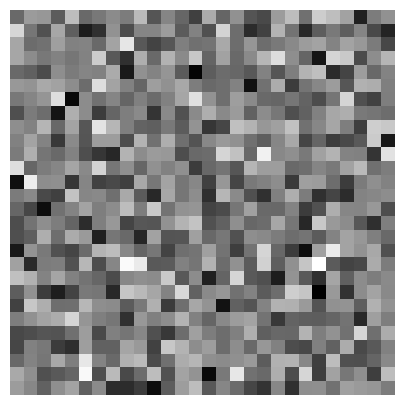

In [178]:
plot(W[:,0].reshape(28,28))

In [179]:
# Again here, but reshaping it.

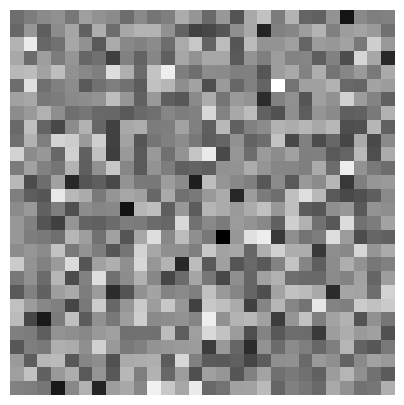

In [180]:
plot(W[:,2].reshape(28,28))

In [181]:
W.shape

torch.Size([784, 10])

In [182]:
(W.T).shape

torch.Size([10, 784])

In [183]:
# Here we want to visualize the weights of our neural network's first layer as images using a montage plot.

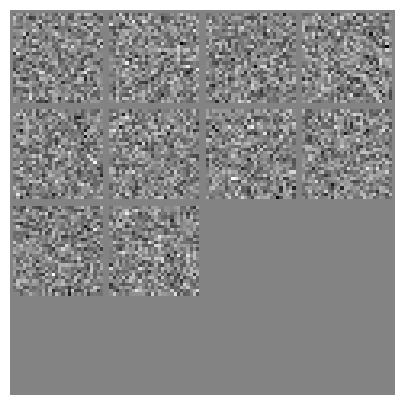

In [184]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [185]:
# Computes the softmax activation function for the input tensor x.

In [186]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [187]:
# Computes the cross-entropy loss between the predicted outputs and the true labels.

In [188]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [189]:
# Computes the accuracy of the model's predictions given the predicted outputs out and the true labels y.

In [190]:
def acc(out,y):
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [191]:
# Used to retrieve a batch of data for either training or testing purposes.

In [192]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [193]:
# The function defined here represents a simple linear model.

In [194]:
def model(x,w):

    return x@w[0]

In [195]:
# This function seems to implement a gradient descent step to update the weights w of a neural network.

In [196]:
def gradient_step(w):

    w[0].data = w[0].data - c.L*w[0].grad.data

    w[0].grad.data.zero_()

In [197]:
# This function seems to generate plots and log the training and testing accuracies using the Weights & Biases (wandb) library.

In [198]:
def make_plots():

    acc_train = acc(model(x,w),y)

    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [199]:
# The function below generates samples from a truncated normal distribution using the Box-Muller transform.

In [200]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [201]:
# This script appears to train a simple linear model using stochastic gradient descent (SGD) and logs the training and testing accuracies using Weights & Biases. Additionally, it generates plots of the weights of the model every 10,000 epochs using a montage plot.

In [ ]:
for run in range(3):

    wb.init(project="Simple_Linear_SGD_123");
    c = wb.config

    c.L = 0.1
    c.b = 1024
    c.epochs = 10000

    w = [GPU(Truncated_Normal((784,10)))]

    for i in range(c.epochs):

        x,y = get_batch('train')

        out = model(x,w)

        loss = cross_entropy(softmax(out),y)

        loss.backward()

        gradient_step(w)

        make_plots()

        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

In [204]:
# This script trains a simple linear model using the Adam optimizer and logs the loss during training using Weights & Biases. Additionally, it generates plots of the weights of the model every 10,000 epochs using a montage plot.

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_Adam_2");
    c = wb.config

    c.L = 0.01
    c.b = 1024
    c.epochs = 100000

    w = [GPU(Truncated_Normal((784,10)))]

    optimizer = torch.optim.Adam(w, lr=c.L)

    for i in range(c.epochs):

        x,y = get_batch('train')

        loss = cross_entropy(softmax(model(x,w)),y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        wb.log({"loss": loss})

        make_plots()

        if i % 10000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())


### Autoencoder


In [ ]:
# This function uses a fixed batch size of 1024, defined locally within the function.

In [206]:
def get_batch(mode):
    b = 1024
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
# The code snippet reshapes the training and testing data tensors X and X_test to have a shape compatible with convolutional neural networks (CNNs).

In [207]:
X = X.reshape(X.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

In [ ]:
# Imports from our library.

In [208]:
import torchvision
from torch.nn.functional import *

In [ ]:
# The code snippet applies normalization to the training and testing data tensors X and X_test using the torchvision.transforms.functional.normalize function.

In [209]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5)
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5)

In [ ]:
# The function Encoder(x, w) is to define an encoder neural network architecture for use in a convolutional autoencoder or a similar task.

In [210]:
def Encoder(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    return x

In [ ]:
# The function Decoder(x, w) is to define a decoder neural network architecture intended to be used in conjunction with the encoder defined previously.

In [211]:
def Decoder(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
# The function below implements an autoencoder neural network architecture by chaining together the encoder and decoder functions defined earlier.

In [212]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [ ]:
# Setting up some parameters here.

In [213]:
num_steps = 1000
batch_size = 512
learning_rate = 1e-3

In [ ]:
# Importing some of our imports from the library.

In [214]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [ ]:
# This function generates random numbers from a truncated normal distribution with a specified shape s, mean mu = 0, and standard deviation sigma = 0.1.

In [215]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
# The code below is used to train an autoencoder neural network using the Adam optimizer.

In [ ]:
# Weight Initialization: It initializes the weights for the encoder and decoder parts of the autoencoder using truncated normal random numbers.
# Optimizer Initialization: It initializes the Adam optimizer with the specified learning rate (learning_rate) and the parameters (params) of the autoencoder weights w.
# Training Loop: It iterates over a fixed number of optimization steps (num_steps).

In [216]:
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

optimizer = torch.optim.Adam(params=w, lr=learning_rate)

for i in range(num_steps):

    x_real,y = get_batch('train')

    x_fake = Autoencoder(x_real,w)

    loss = torch.mean((x_fake - x_real)**2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 100 == 0: print(loss.item())

1.3799906969070435
0.15681971609592438
0.11775688081979752
0.09722765535116196
0.09123452007770538
0.08740703016519547
0.08192194253206253
0.07746082544326782
0.07688623666763306
0.07182241976261139


In [ ]:
# Here we are retrieving a batch of test images and their corresponding labels using the get_batch function with mode set to 'test'.

In [217]:
image_batch,y = get_batch('test')

In [ ]:
# Here we are reconstructing the test images using the trained autoencoder model Autoencoder with the weights w.

In [218]:
image_batch_recon = Autoencoder(image_batch,w)

In [ ]:
# This expression calculates the mean squared error (MSE) between the reconstructed images (image_batch_recon) and the original input images (image_batch).

In [219]:
torch.mean((image_batch_recon - image_batch)**2)

tensor(0.0667, device='cuda:0', grad_fn=<MeanBackward0>)

In [ ]:
# Plotting our data.

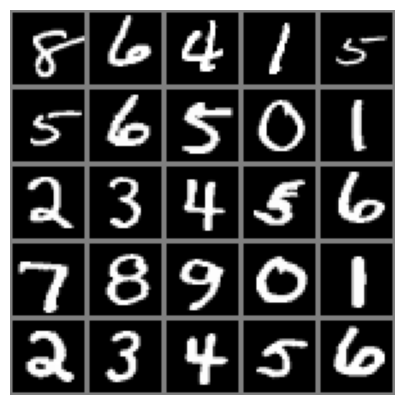

In [220]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy())

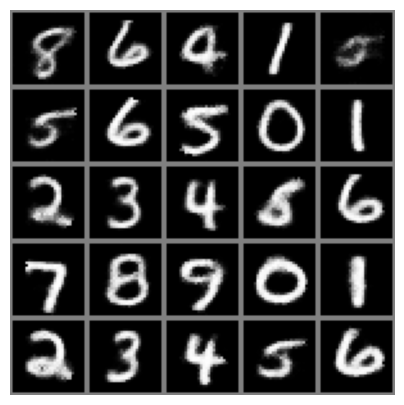

In [221]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy())


### Generator



In [ ]:
# We are starting off by setting some parameters.

In [222]:
latent_size = 64
hidden_size = 256
image_size = 784
b = 1024

In [ ]:
# Here we are preparing datasets for training and testing using different datasets: MNIST, KMNIST, and Fashion MNIST.

In [ ]:
#MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set = MNIST('./data', train=False, download=True)

#KMNIST
#train_set = KMNIST('./data', train=True, download=True)
#test_set = KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = FashionMNIST('./data', train=True, download=True)
test_set = FashionMNIST('./data', train=False, download=True)

In [ ]:
# Here we are preprocessing the images from the Fashion MNIST dataset.

In [224]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
# Here we are filtering the dataset to only include images corresponding to a specific label n.

In [225]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
# The shapes of the arrays after the filters.

In [226]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [ ]:
# Here we are converting our data to PyTorch tensors and moving them to the GPU using the GPU_data function.

In [227]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
# Here we are obtaining a batch of training data using the get_batch function.

In [228]:
x,y = get_batch('train')

In [229]:
x.shape

torch.Size([1024, 1, 28, 28])

In [ ]:
# Here is the plotted result. The image.

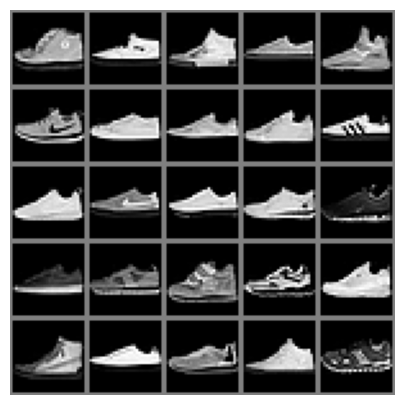

In [230]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
# Here we are defining weights for a discriminator (D) and a generator (G) in a Generative Adversarial Network (GAN).

In [231]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

In [ ]:
# Here we are defining the discriminator network (D) for your GAN.

In [232]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
# Here we are defining the generator network (G) for your GAN.

In [233]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [234]:
b = 1024

In [235]:
batch_size = b

In [236]:
batch_size

1024

In [ ]:
# Setting up optimizers for training our GAN model and defining labels for real and fake images.

In [237]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)

real_labels = (torch.ones(batch_size, 1).cuda())
fake_labels = (torch.zeros(batch_size, 1).cuda())

In [ ]:
# Calculating the total number of steps required for training our GAN model over multiple epochs.

In [238]:
num_epochs = 500
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [ ]:
# Generating random noise vectors z1 and z2 to use as input to the generator during training.

In [239]:
z1 = (torch.randn(steps,batch_size,latent_size).cuda())
z2 = (torch.randn(steps,batch_size,latent_size).cuda())

In [ ]:
# Here we are implementing the training loop for your GAN model.

In [ ]:
# This loop trains the GAN model by alternately optimizing the discriminator and generator networks. The discriminator learns to distinguish between real and fake images, while the generator learns to generate realistic-looking images that can fool the discriminator.

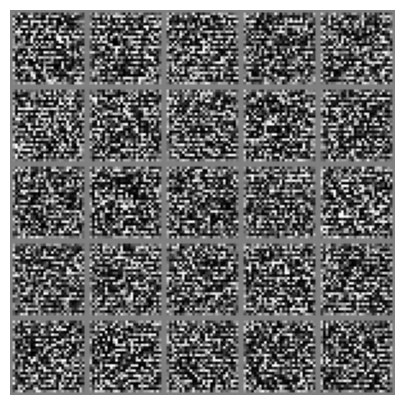

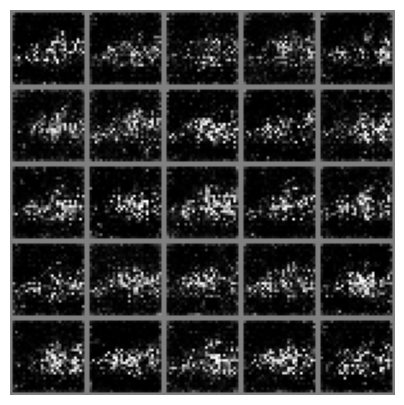

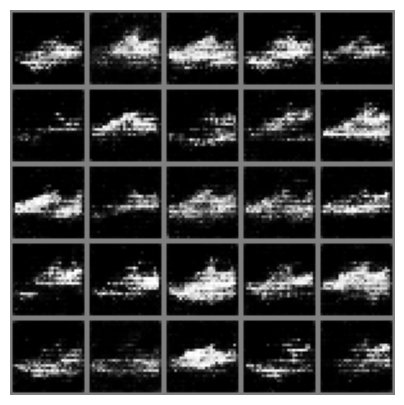

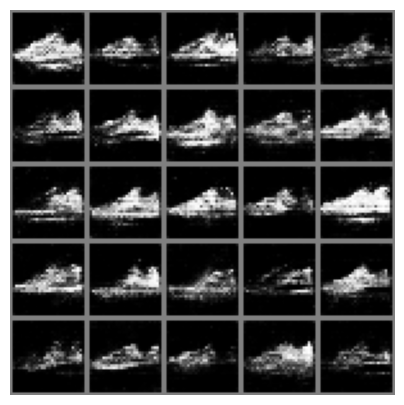

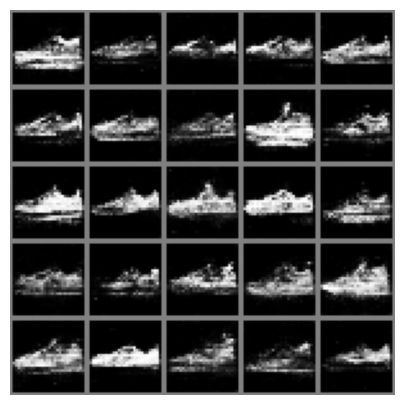

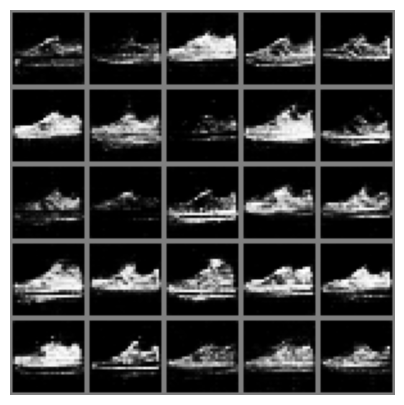

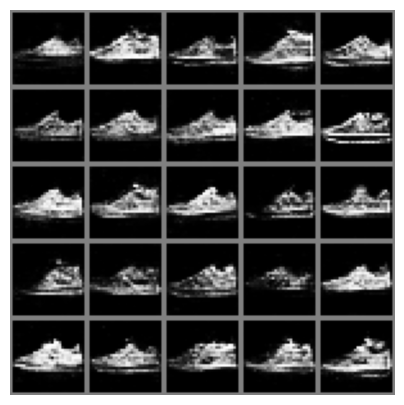

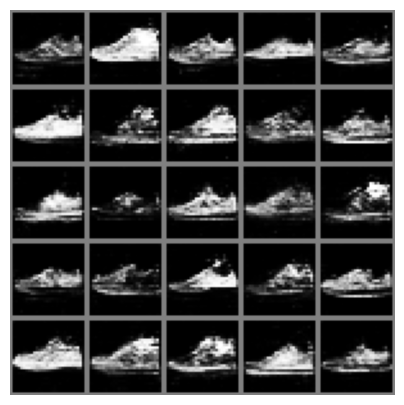

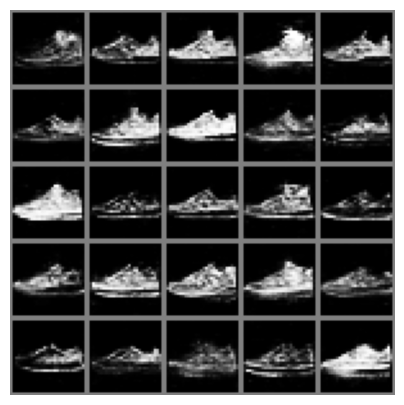

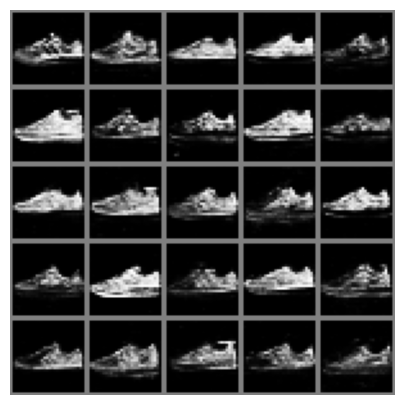

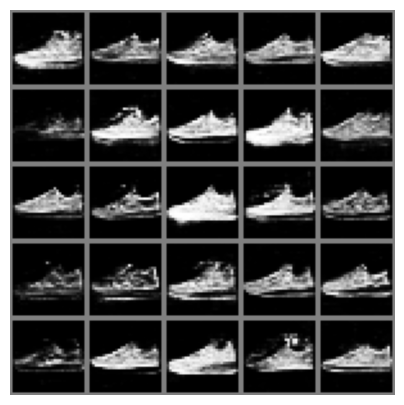

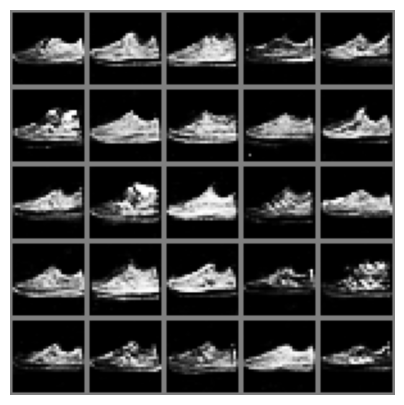

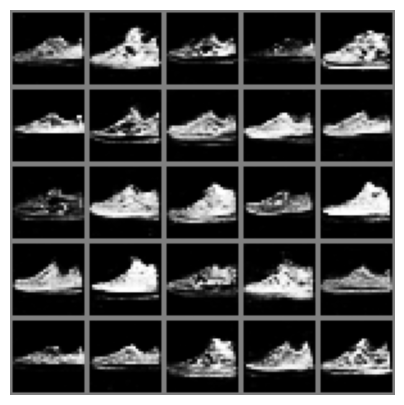

In [240]:
for i in range(steps):

    images,y = get_batch('train')

    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()


    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()


    if i % 200 == 0:
        out = G(z1[np.random.randint(steps)],w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])

In [ ]:
# The expression z1[np.random.randint(steps)] selects a random noise vector from the tensor z1, which has a shape of (steps, batch_size, latent_size).

In [241]:
z1[np.random.randint(steps)].shape

torch.Size([1024, 64])

In [ ]:
# Generating a noise vector using PyTorch and then moving it to the GPU.

In [242]:
noise = GPU_data(torch.randn(1,64))

<ipython-input-121-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


In [ ]:
# The putput.

In [243]:
output = G(noise,w)

In [ ]:
# The shape.

In [244]:
output.shape

torch.Size([1, 1, 28, 28])

In [ ]:
# The plotted result.

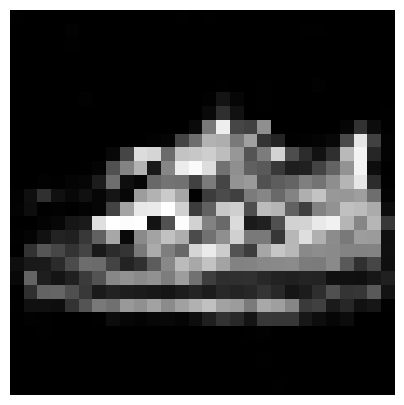

In [245]:
plot(output[0,0])